<a href="https://colab.research.google.com/github/surya333356/Project-Name--Unsupervised-ML---Myntra-Online-Retail-Customer-Segmentation/blob/main/Unsupervised_ML_Myntra_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Unsupervised ML - Myntra Online Retail Customer Segmentation



##### **Project Type**    - EDA & Unsupervised Learning - RFM and K-Mean Clustering
##### **Contribution**    - Individual
##### **Name** - Ravi Sharma

# **Project Summary -**

__Myntra, a leading Indian fashion e-commerce platform, offers a wide selection of clothing, accessories, and lifestyle products. This project focuses on leveraging customer transaction data, including records from Myntra Gifts Ltd., its UK-based subsidiary, to segment the customer base using RFM analysis and K-Means clustering. By understanding purchasing behavior across different markets, the goal is to identify high-value customers, engage inactive users, and implement targeted marketing strategies for enhanced personalization and business growth.__

# **GitHub Link -**

*https://github.dev/RaviSharma1901/Modulr-6/blob/main*

# **Problem Statement**


__Myntra, a leading online retail platform, faces challenges in marketing to its heterogeneous customer base. This project aims to utilize historical retail transaction data to uncover actionable customer segments using unsupervised machine learning techniques. By applying RFM (Recency, Frequency, Monetary) analysis, we intend to analyze customer behavior deeply and segment customers effectively using clustering algorithms like K-Means. The goal is to drive targeted marketing strategies and improve customer retention by understanding the diverse purchasing patterns of Myntra’s clientele__

__Key Features:__
1. InvoiceNo : A unique transaction identifier, essential for tracking purchase history.
2. StockCode : Product-specific identification to analyze purchasing patterns at the product level.
3. Description : Names of the products, adding context to customer preferences.
4. CustomerID : Unique identifier for customers, critical for building customer-level insights.
5. Country : Geographic data to explore location-based trends in purchasing behavior.
6. Quantity : The number of units bought per product in a transaction, used to assess buying volume.
7. UnitPrice : Price per unit of each product, needed for monetary calculations.
8. InvoiceDate : The timestamp of the transaction, which aids in determining recency for RFM analysis.


__Methodology:__

1. RFM Analysis :  
   - Recency : Measures how recently a customer made a purchase.  
   - Frequency : Tracks how often a customer makes purchases.  
   - Monetary : Assesses the total spending of a customer.  
   This provides a clear picture of customer value and engagement.

2. K-Means Clustering :  

   Using the RFM scores, K-Means clustering groups customers based on their behavior into clusters such as loyal customers, occasional buyers, and inactive users. This helps in customizing engagement strategies.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/Online Retail.xlsx'


Mounted at /content/drive


### Dataset First View

In [ ]:
myntra_data = pd.read_excel(path)


In [ ]:
# Dataset First Look
myntra_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Creating a duplicate copy of original dataset before making any changes
myntra_df = myntra_data.copy()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
myntra_df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
myntra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print("There are ",myntra_df.duplicated().sum(), " duplicate rows in the dataset")

There are  5268  duplicate rows in the dataset


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
myntra_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
print(f"Null values in Description Column: {myntra_df['Description'].isnull().sum()} and in CustomerID Column: {myntra_df['CustomerID'].isnull().sum()}")

Null values in Description Column is 1454 and in CustomerID Column is 135080 


### What did you know about your dataset?

__*The dataset includes 5,268 duplicate records and contains missing values in the Description and CustomerID columns. Specifically, 1,454 values are missing in the Description column, while 135,080 entries are absent in the CustomerID column.*__

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
myntra_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
myntra_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303



__*1) There are some missing values in the Description and CustomerID columns, which will be addressed before performing Exploratory Data Analysis (EDA).*__

__*2) The Quantity and UnitPrice columns have negative minimum values, likely resulting from canceled orders.*__

__*3) The distribution of Quantity and UnitPrice appears skewed, with a significant gap between the 75th percentile and the maximum value.*__




### Variables Description


__InvoiceNo__: A unique 6-digit number assigned to each transaction. If the number starts with 'C', it indicates a canceled order.

__StockCode:__ A 5-digit identifier assigned to each product, ensuring uniqueness.

__Description:__ The name of the product (item) being purchased.

__Quantity:__ The number of units of a product bought in a single transaction.

__InvoiceDate:__ The date and time when a transaction was recorded.

__UnitPrice:__ The price per unit of a product, measured in sterling currency.

__CustomerID:__ A unique 5-digit number assigned to each customer for tracking purposes.

__Country:__ The country of residence of the customer placing the order.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
#print(myntra_df.apply(lambda col : col.unique()))

for col in myntra_df.columns:
    print(f"Unique values in {col} column are {myntra_df[col].unique()} \n\n")

Unique values in InvoiceNo column are [536365 536366 536367 ... 581585 581586 581587] 


Unique values in StockCode column are ['85123A' 71053 '84406B' ... '90214U' '47591b' 23843] 


Unique values in Description column are ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE'] 


Unique values in Quantity column are [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69  

## ***3. Feature Engineering & Data Pre-processing***

### **Handling duplicates and missing values in the dataset:**

In [ ]:
#count percentage wise missing values
def missing_value_check(df):
  selected_df = df[['Description', 'CustomerID']]
  per_miss_values=selected_df.isnull().sum()*100/len(myntra_df)
  return per_miss_values

In [ ]:
#checking percentage wise missing values
print(missing_value_check(myntra_df))

Description     0.268311
CustomerID     24.926694
dtype: float64


In [ ]:
# Drop the Duplicate Values
myntra_df = myntra_df.drop_duplicates()

In [ ]:
myntra_df.duplicated().sum()

np.int64(0)

In [ ]:

myntra_df = myntra_df.dropna()

In [ ]:
# Again check missing values
myntra_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# check the shape of the dataset
myntra_df.shape

(401604, 8)



__*1) We have successfully handled missing values and eliminated duplicate records. After cleaning, the dataset now has 401,604 rows and 8 columns.*__

__*Next, we will identify and analyze canceled orders for further processing.*__



In [ ]:
#check for order cancellations data
myntra_df['InvoiceNo'] = myntra_df['InvoiceNo'].astype('str')
myntra_df[myntra_df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom




__*1) There are 8872 records where the orders are cancelled and the quantity contains a negative value.*__

__*2) We will drop these cancelled order records from our analysis.*__



In [ ]:
# Dropping canceled orders by keeping only non-canceled transactions.
myntra_df = myntra_df[~myntra_df['InvoiceNo'].str.startswith('C')]

# check the shape of the data after removing cancelled orders
myntra_df.shape

(392732, 8)

In [ ]:
# Final description of the dataset
myntra_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773




*   There are no negative values in the Quantity and UnitPrice column now.
*   But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

*   We will investigate this column and remove those records.





In [ ]:
# check the columns having zero unit price
myntra_df[myntra_df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom




*   There are few records with zero values in UnitPrice which cannot be true so we will drop these records.




In [ ]:
# Include only positive UnitPrice values and Exclude records with UnitPrice equal to or below zero.
myntra_df = myntra_df[myntra_df['UnitPrice']>0]

In [ ]:
# check description of UnitPrice after dropping
myntra_df['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [ ]:
# first 5 rows of the data
myntra_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


__*The dataset is in good shape for EDA, but let's take a moment to create additional features first.*__


### **Let us create some new features (Feature Engineering):**

In [ ]:
# Create a Total Amount column
myntra_df['TotalAmount'] = myntra_df['Quantity'] * myntra_df['UnitPrice']

In [ ]:
# Top 5 rows of the data
myntra_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Convert InvoiceDate to datetime format
myntra_df['InvoiceDate'] = pd.to_datetime(myntra_df['InvoiceDate'], format='%m/%d/%y %H:%M')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### __Temporal Analysis__

**Understanding purchase patterns over time:**

In [ ]:
# time component of the date
myntra_df['Year'] = myntra_df['InvoiceDate'].dt.year
myntra_df['Month'] = myntra_df['InvoiceDate'].dt.month
myntra_df['Day'] = myntra_df['InvoiceDate'].dt.day
myntra_df['Hour'] = myntra_df['InvoiceDate'].dt.hour

In [ ]:
myntra_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,DayOfWeek,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2,20.34


__1) Visualize the purchase patterns by hour__

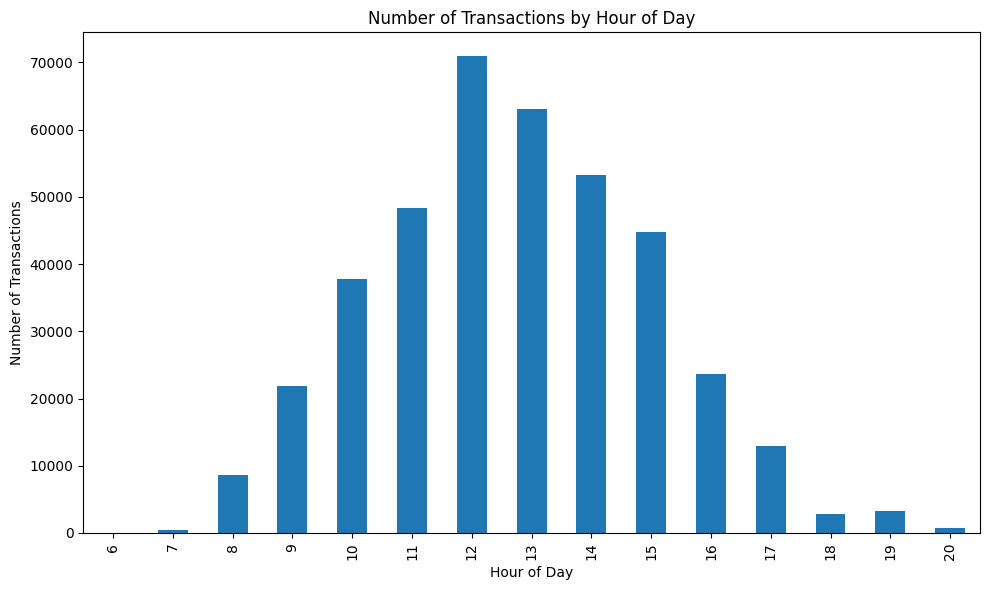

In [ ]:

plt.figure(figsize=(10,6))
myntra_df.groupby('Hour')['InvoiceNo'].count().plot(kind='bar')

plt.title('Number of Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?

__Peak Transaction Hours:__ The number of transactions gradually increases from 7 AM and peaks between 12 PM and 3 PM, with the highest transactions recorded (~80,000 transactions).

__Busiest Time and Decline for Sales:__ Since afternoon hours (12 PM - 3 PM) have the highest transaction volume, this could indicate increased shopping activity during lunch breaks or planned purchases during midday. Transactions start decreasing after 3 PM, suggesting less shopping activity later in the day

__Business Optimization:__ Retailers could optimize staffing, promotions, and customer engagement strategies during peak hours to maximize sales.

**2) Visulize the purchase patterns by date of week**


In [ ]:
# days of week
myntra_df['DayOfWeek'] = myntra_df['InvoiceDate'].dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

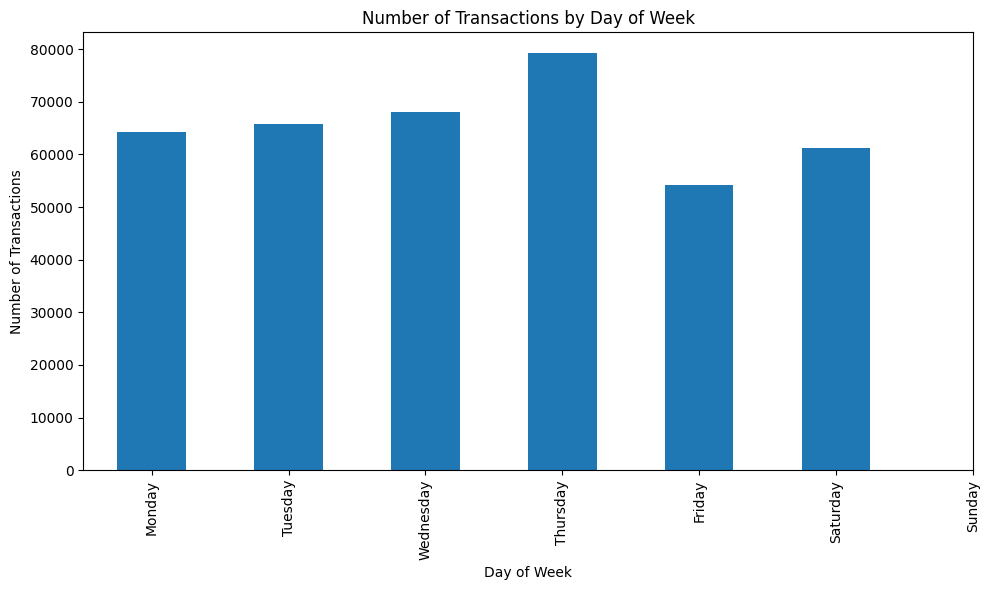

In [ ]:
plt.figure(figsize=(10,6))
myntra_df.groupby('DayOfWeek')['InvoiceNo'].count().plot(kind='bar')

plt.title('Number of Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=range(7), labels=day_names)
plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?

__Highest Transactions on Thursday:__ Thursday has the highest number of transactions, suggesting increased customer activity midweek. This could be influenced by promotional sales or habitual shopping behaviors.

__Tuesday and Monday Are Also High:__ These days show significant transaction activity, possibly indicating early-week shopping habits.

__Steady Decline Toward the Weekend:__ suggesting that customers are less active later in the week.

__Lowest Transactions on Sunday:__ Sunday sees the fewest transactions, which may indicate low customer engagement on weekends or customers prioritizing leisure over shopping.

__Business Implications:__      
Optimize marketing efforts for high-traffic days like Thursday. Promotions & discounts could be strategically placed early in the week to encourage more sales momentum.

### __Product Analysis__

__Examining product popularity and pricing__

In [ ]:
# Top Selling Products
top_product = myntra_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)#.reset_index()
top_product

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

__3) Visualize the Top Selling Product__

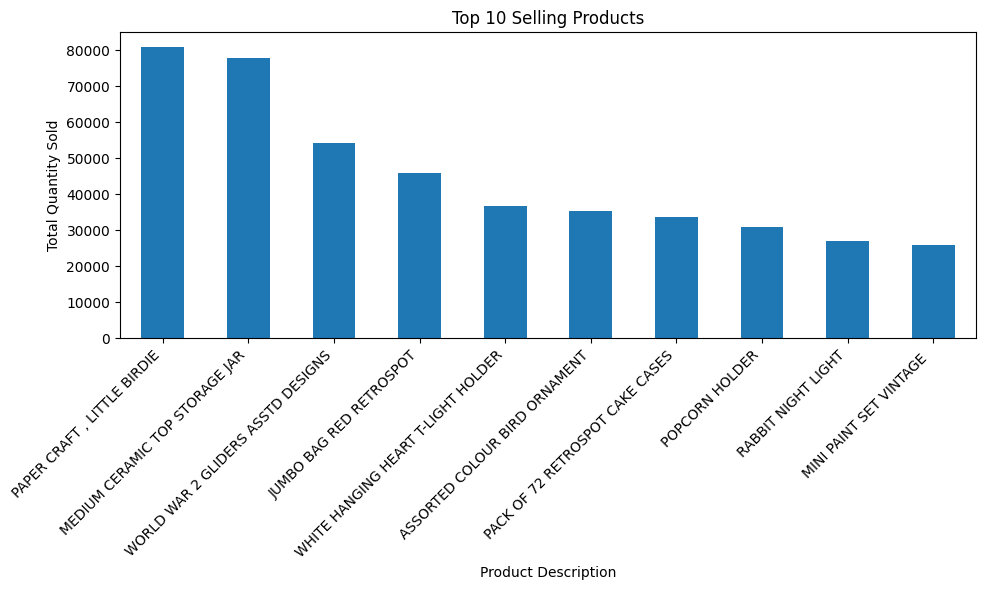

In [ ]:
plt.figure(figsize=(10,6))
top_product.plot(kind='bar')

plt.title('Top 10 Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### What is/are the insight(s) found from the chart?

The best-selling products are World War 2 gliders, Jumbo bag red retrospot, and Assorted colour bird ornaments. These products are popular, possibly because they catch people’s attention or fit current trends.

__4) Price Distribution__

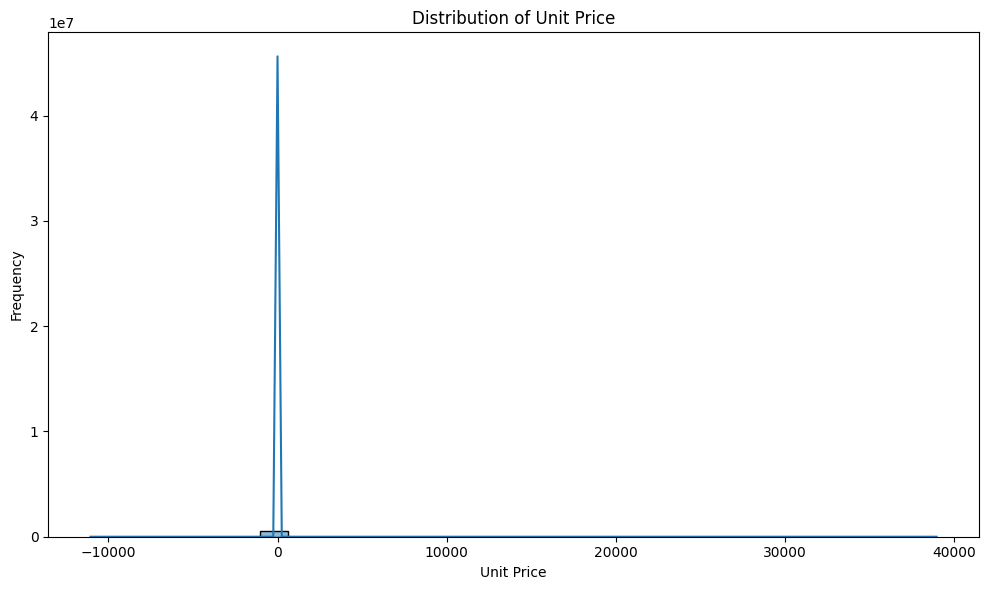

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(myntra_df['UnitPrice'], bins=30, kde=True)

plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?

It seems that most unit prices are clustered around zero, with a sharp peak indicating a very high frequency in that range. This means the majority of your products are priced very low, and only a few items have significantly higher prices.

This could indicate that lower-priced products dominate sales. So adjusting the pricing structure or introducing more premium items could be beneficial.

### __Customer Analysis__

__Analyzing customer purchase behavior__

In [ ]:
# customer Purchase Frequency
customer_frequency = myntra_df.groupby('CustomerID')['InvoiceNo'].nunique() # nunique() - will return how many distinct value exist.

# Customer Total Spending
customer_spending = myntra_df.groupby('CustomerID')['TotalAmount'].sum()

__5) Customer purchase frequency__



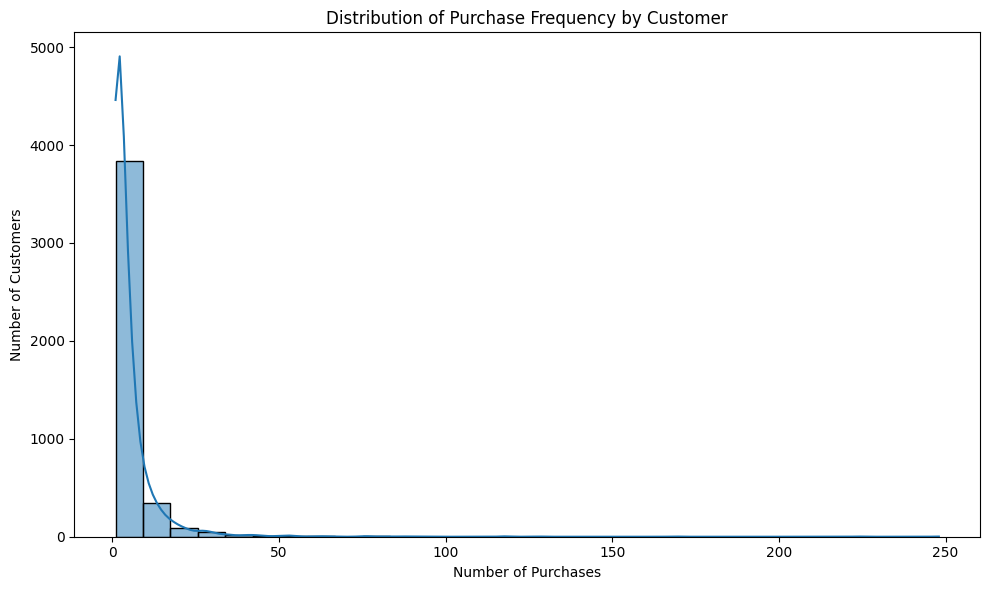

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(customer_frequency, bins=30, kde=True)

plt.title('Distribution of Purchase Frequency by Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


##### What is/are the insight(s) found from the chart?

Most customers make only a few purchases, while a smaller group buys frequently. This suggests that while you have many occasional buyers, only a few customers are loyal repeat purchasers.

__6) Customer spending analysis__

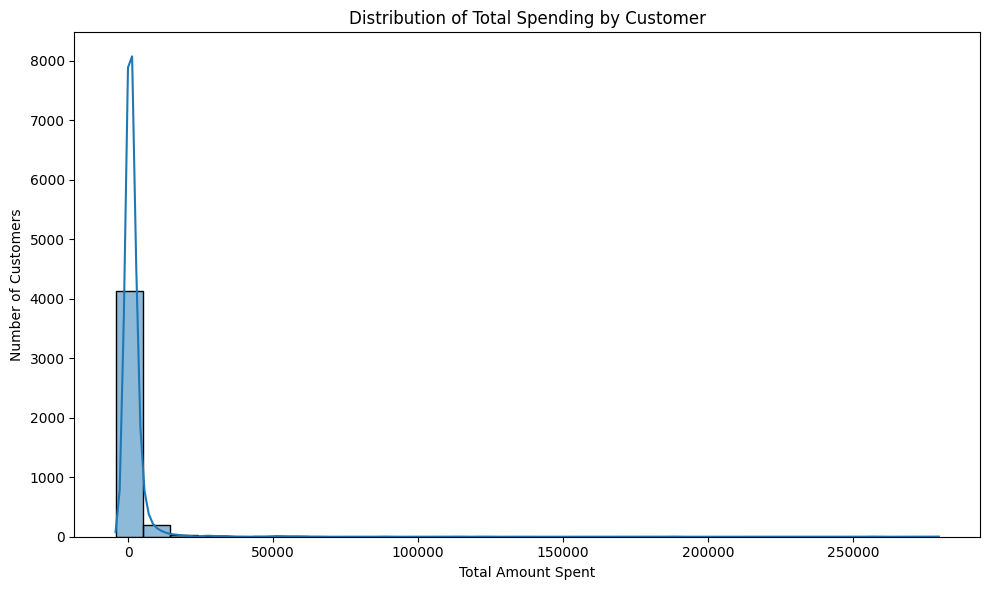

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, bins=30, kde=True)

plt.title('Distribution of Total Spending by Customer')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?
Most customers spend relatively small amounts, with a sharp peak near the lower end of the range. This indicates that the majority of customers make lower-value purchases, while only a few spend significantly more. The long tail in the distribution suggests the presence of high-value customers, but they are rare.

#### __Geographic Analysis__

__Understanding regional purchasing patterns__

In [ ]:
# Sales By Country
sales_by_country = myntra_df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)

# Top 10 Countries by customer count
country_customers = myntra_df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)

__7) Sales By Country__

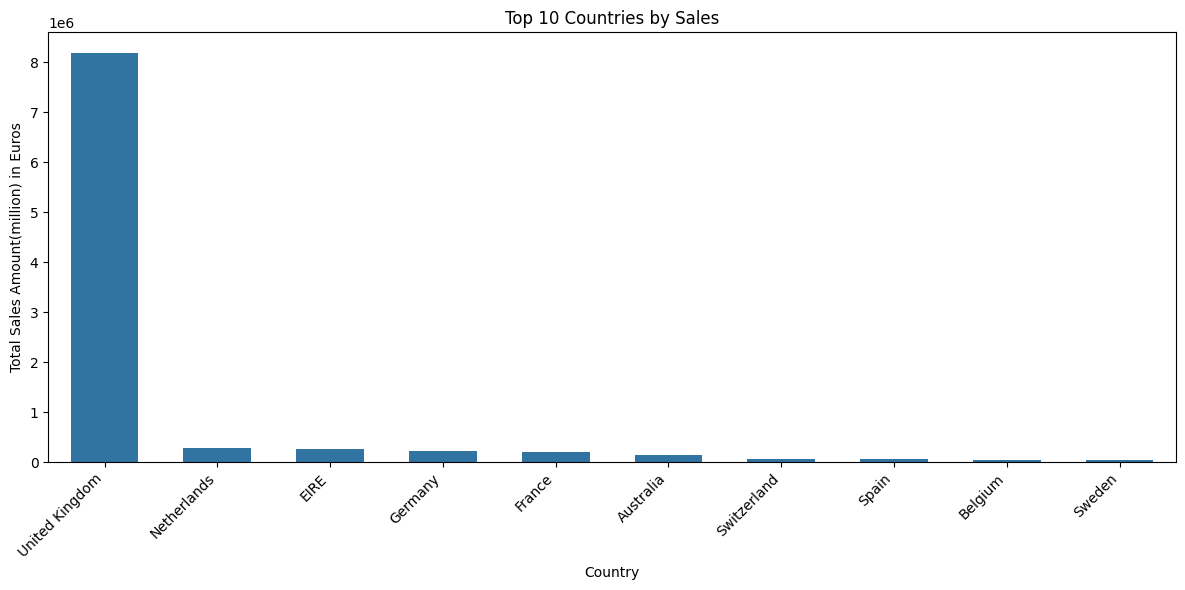

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values,width=0.6)
#sales_by_country.plot(kind='bar')

plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount(million) in Euros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?
the United Kingdom dominates sales, with nearly 8 million in total sales significantly ahead of all other countries. The next highest countries, like the Netherlands, EIRE, and Germany, each have sales below 1 million, making the UK the clear leader in the market.

This could mean that strongest customer base is in the UK, so focusing marketing efforts or product expansion there might be beneficial.

__8) Customer distribution by country__

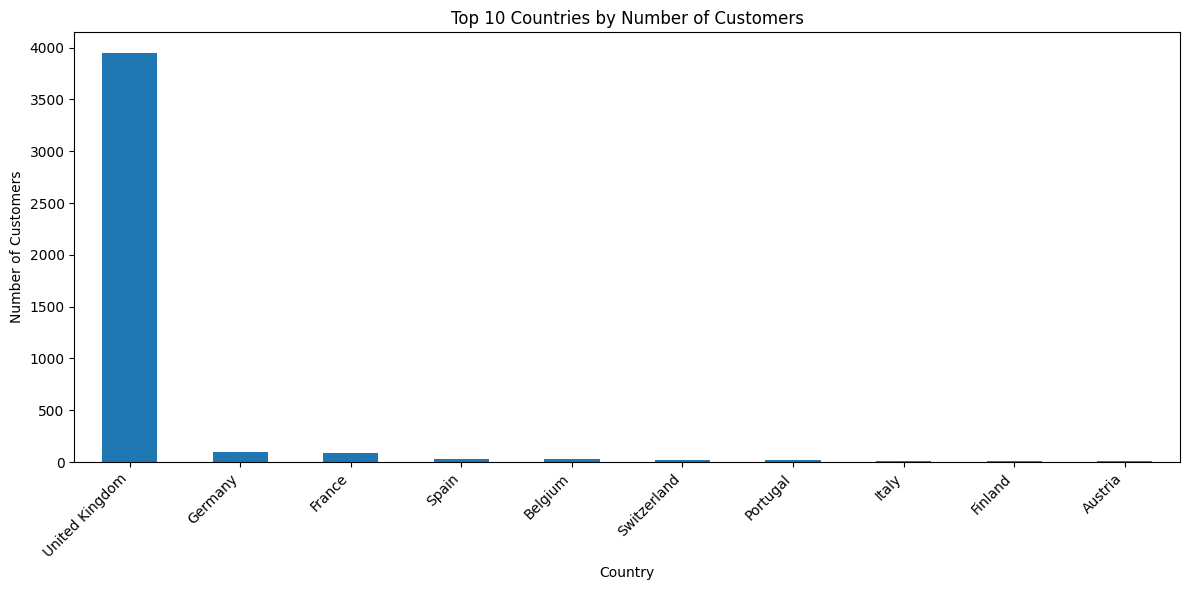

In [ ]:
plt.figure(figsize=(12, 6))
country_customers.plot(kind='bar')
plt.title('Top 10 Countries by Number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?

The United Kingdom has highest number of customers, with about 4000, while all other countries including Germany, France, and Spain have less than 500 customers each.

Expand marketing in lower-performing countries to grow your customer base there.

### __Basket Analysis__

__To identify the most frequently purchased products__

In [ ]:
# Create a pivot table for basket analysis
basket = myntra_df.pivot_table(index='InvoiceNo', columns='Description', values='Quantity', aggfunc='sum', fill_value=0) # fill_value=0 will replace NaN with 0

# Convert to binary representation (purchased or not)
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0) # 1 means "this product was in the transaction" and 0 means "No"

# Calculate support matric for each product
support = basket_binary.sum() / len(basket_binary) # For each product, this calculates how many transactions include it

top_products = support.sort_values(ascending=False).head(10)

print("Top 10 most frequently purchased products:")
print(top_products)

Top 10 most frequently purchased products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    0.092449
JUMBO BAG RED RETROSPOT               0.085576
REGENCY CAKESTAND 3 TIER              0.081363
PARTY BUNTING                         0.068968
LUNCH BAG RED RETROSPOT               0.063978
ASSORTED COLOUR BIRD ORNAMENT         0.059519
SET OF 3 CAKE TINS PANTRY DESIGN      0.056655
PACK OF 72 RETROSPOT CAKE CASES       0.053997
LUNCH BAG  BLACK SKULL.               0.052074
NATURAL SLATE HEART CHALKBOARD        0.051092
dtype: float64


__9) Top Frequently Purchased Products__

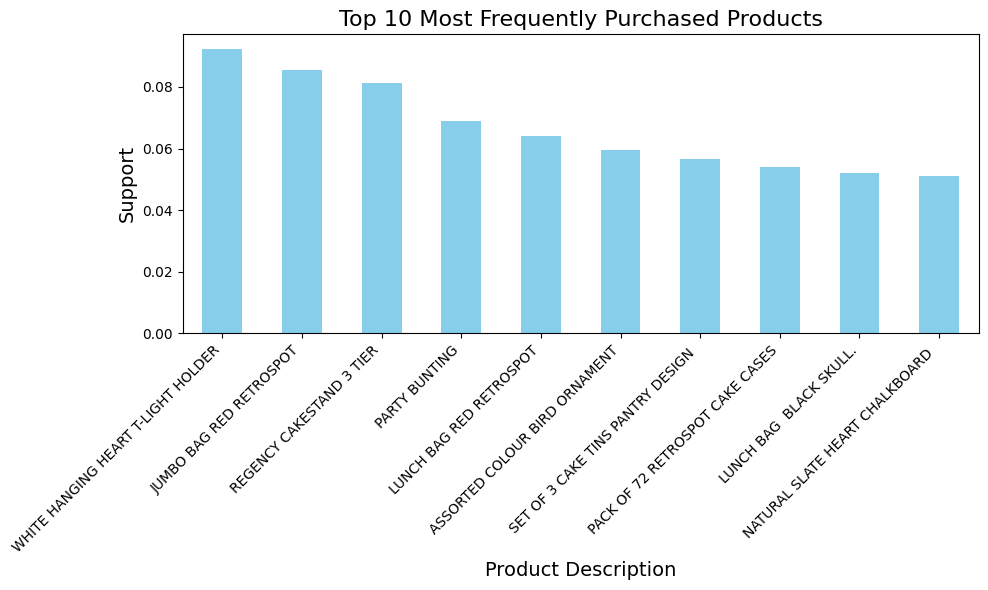

In [ ]:
# Create bar chart visualization
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequently Purchased Products', fontsize=16)
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Support', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### __Distribution of the numerical features__

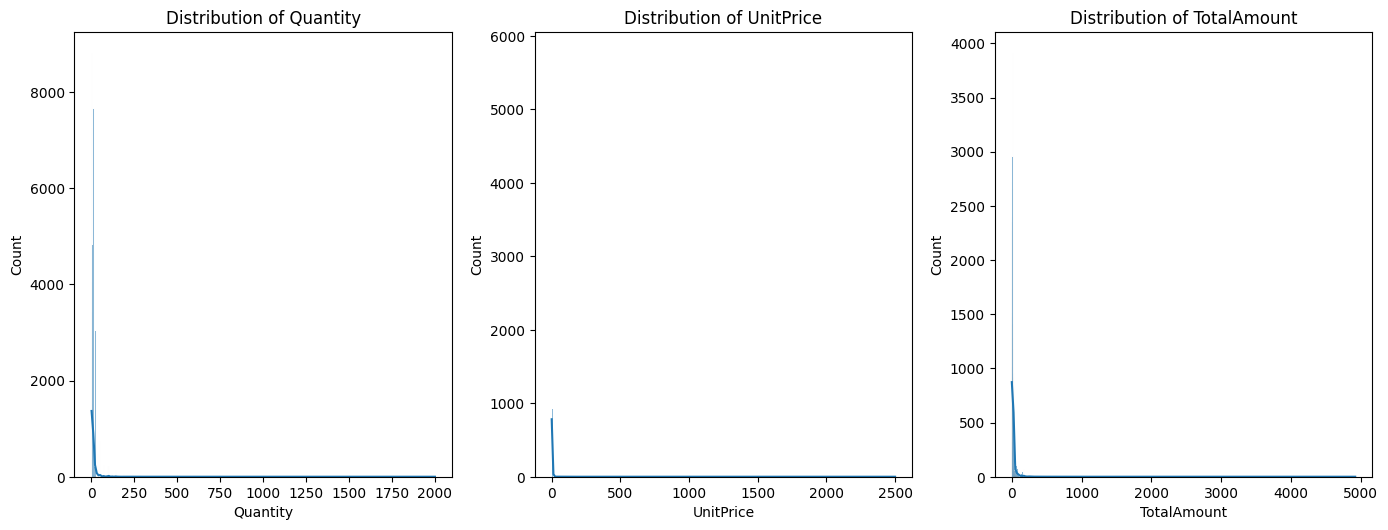

In [ ]:
plt.figure(figsize=(14, 10))
df_sample = myntra_df.sample(n=50000, random_state=42)
# select the numerical columns
features = df_sample.iloc[:, [3,5,8]]

# i start with 1
for i, col in enumerate(features.columns,1): # i start with 1
        plt.subplot(2, 3, i)
        sns.histplot(df_sample[col], kde=True)
        plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

This graph is skewed, which means the data isn't evenly distributed.

__Handle Skewed Data:__ I Applied log transformations to make the data more normal.

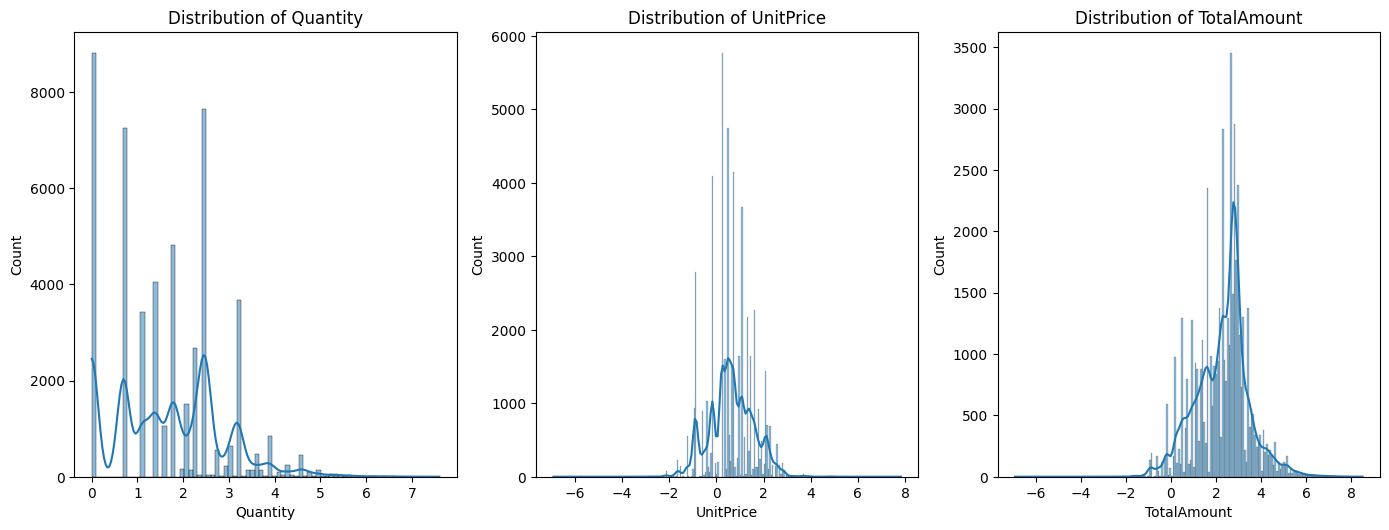

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(features.columns,1): # i start with 1
        plt.subplot(2, 3, i)
        sns.histplot(np.log(df_sample[col]), kde=True)
        plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

log transformation has helped make the distributions more normal, especially for Unit Price and Total Amount, which are now centered around zero. However, the Quantity distribution still appears skewed, meaning it might need further adjustments.

We have to handle skewness in Quantity.

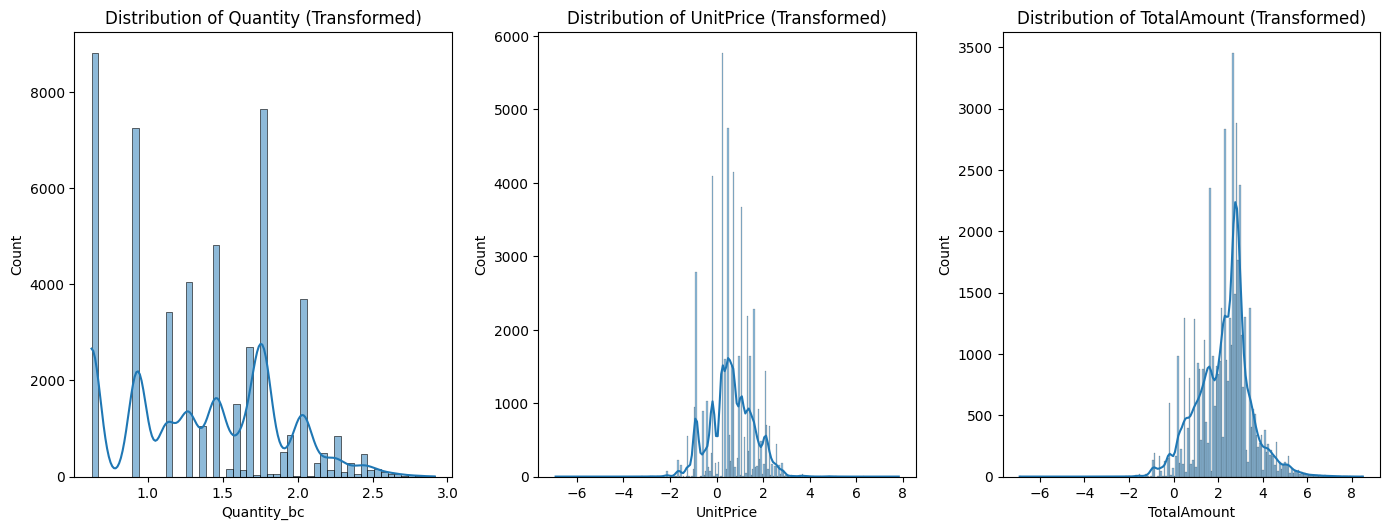

Optimal Lambda for Box-Cox: -0.3107249011591804


In [ ]:

# Apply Box-Cox transformation (Quantity must be positive so used +1)
df_sample['Quantity_bc'], lam = stats.boxcox(df_sample['Quantity'] + 1)

# Visualize transformed features
plt.figure(figsize=(14, 10))
for i, col in enumerate(features.columns, 1):
    plt.subplot(2, 3, i)

    # Apply log transformation for other features, Box-Cox for Quantity
    transformed_data = np.log(df_sample[col]) if col != 'Quantity' else df_sample['Quantity_bc']

    sns.histplot(transformed_data, kde=True)
    plt.title(f"Distribution of {col} (Transformed)")

plt.tight_layout()
plt.show()

print(f"Optimal Lambda for Box-Cox: {lam}")


I applied __Box-Cox transformation__ on Quantity. Skewness is significantly reduced, though there are still some peaks.

-0.31 is a valid lambda for Box-Cox transformation So data is well-balanced for RFM analysis

__Unit Price (Log)__ – Distribution looks fairly normal.

__Total Amount (Log)__ – Also appears normally distributed.

Now data is now more balanced, and ready to proceed with RFM segmentation

## **RFM Model (Recency, Frequency and Monetary):**

### **RFM Customer Segmentation Model**

RFM analysis segments customers based on three metrics:

__Recency (R):__ How recently a customer made a purchase

__Frequency (F):__ How often a customer makes a purchase

__Monetary Value (M):__ How much money a customer spends

#### **Filter UK data only:**

##### Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [ ]:
# filter UK data only
myntra_df=myntra_df[myntra_df['Country']=='United Kingdom']
# print the shape of the data
myntra_df.shape

(349203, 14)

### **Calculating RFM Scores:**

In [ ]:
# Define latest date for recency calculation
latest_date = myntra_df['InvoiceDate'].max() + pd.Timedelta(days=1) # Add days=1 - which Prevent recency (latest_date - last purchase date) could mistakenly calculate zero"

# Create RFM model scores for each customer
RFM_df = myntra_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': lambda x: x.nunique(),  # Frequency
    'TotalAmount': lambda x: x.sum()  # Monetary
})

# Convert Recency (InvoiceDate) into type int safely
RFM_df['InvoiceDate'] = RFM_df['InvoiceDate'].astype(int)

# Rename columns for clarity
RFM_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

# Reset index and show sample output
print(RFM_df.reset_index().head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12747.0        2         11   4196.01
2     12748.0        1        209  33053.19
3     12749.0        4          5   4090.88
4     12820.0        3          4    942.34


In [ ]:
# descriptive stats of the rfm dataframe
RFM_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.208418,4.246429,1858.424654
std,99.533854,7.199202,7478.631256
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,298.185000
50%,51.000000,2.000000,644.975000
75%,143.000000,5.000000,1571.285000
max,374.000000,209.000000,259657.300000


#### **Distribution of Recency, Frequency and Monetary Value:**

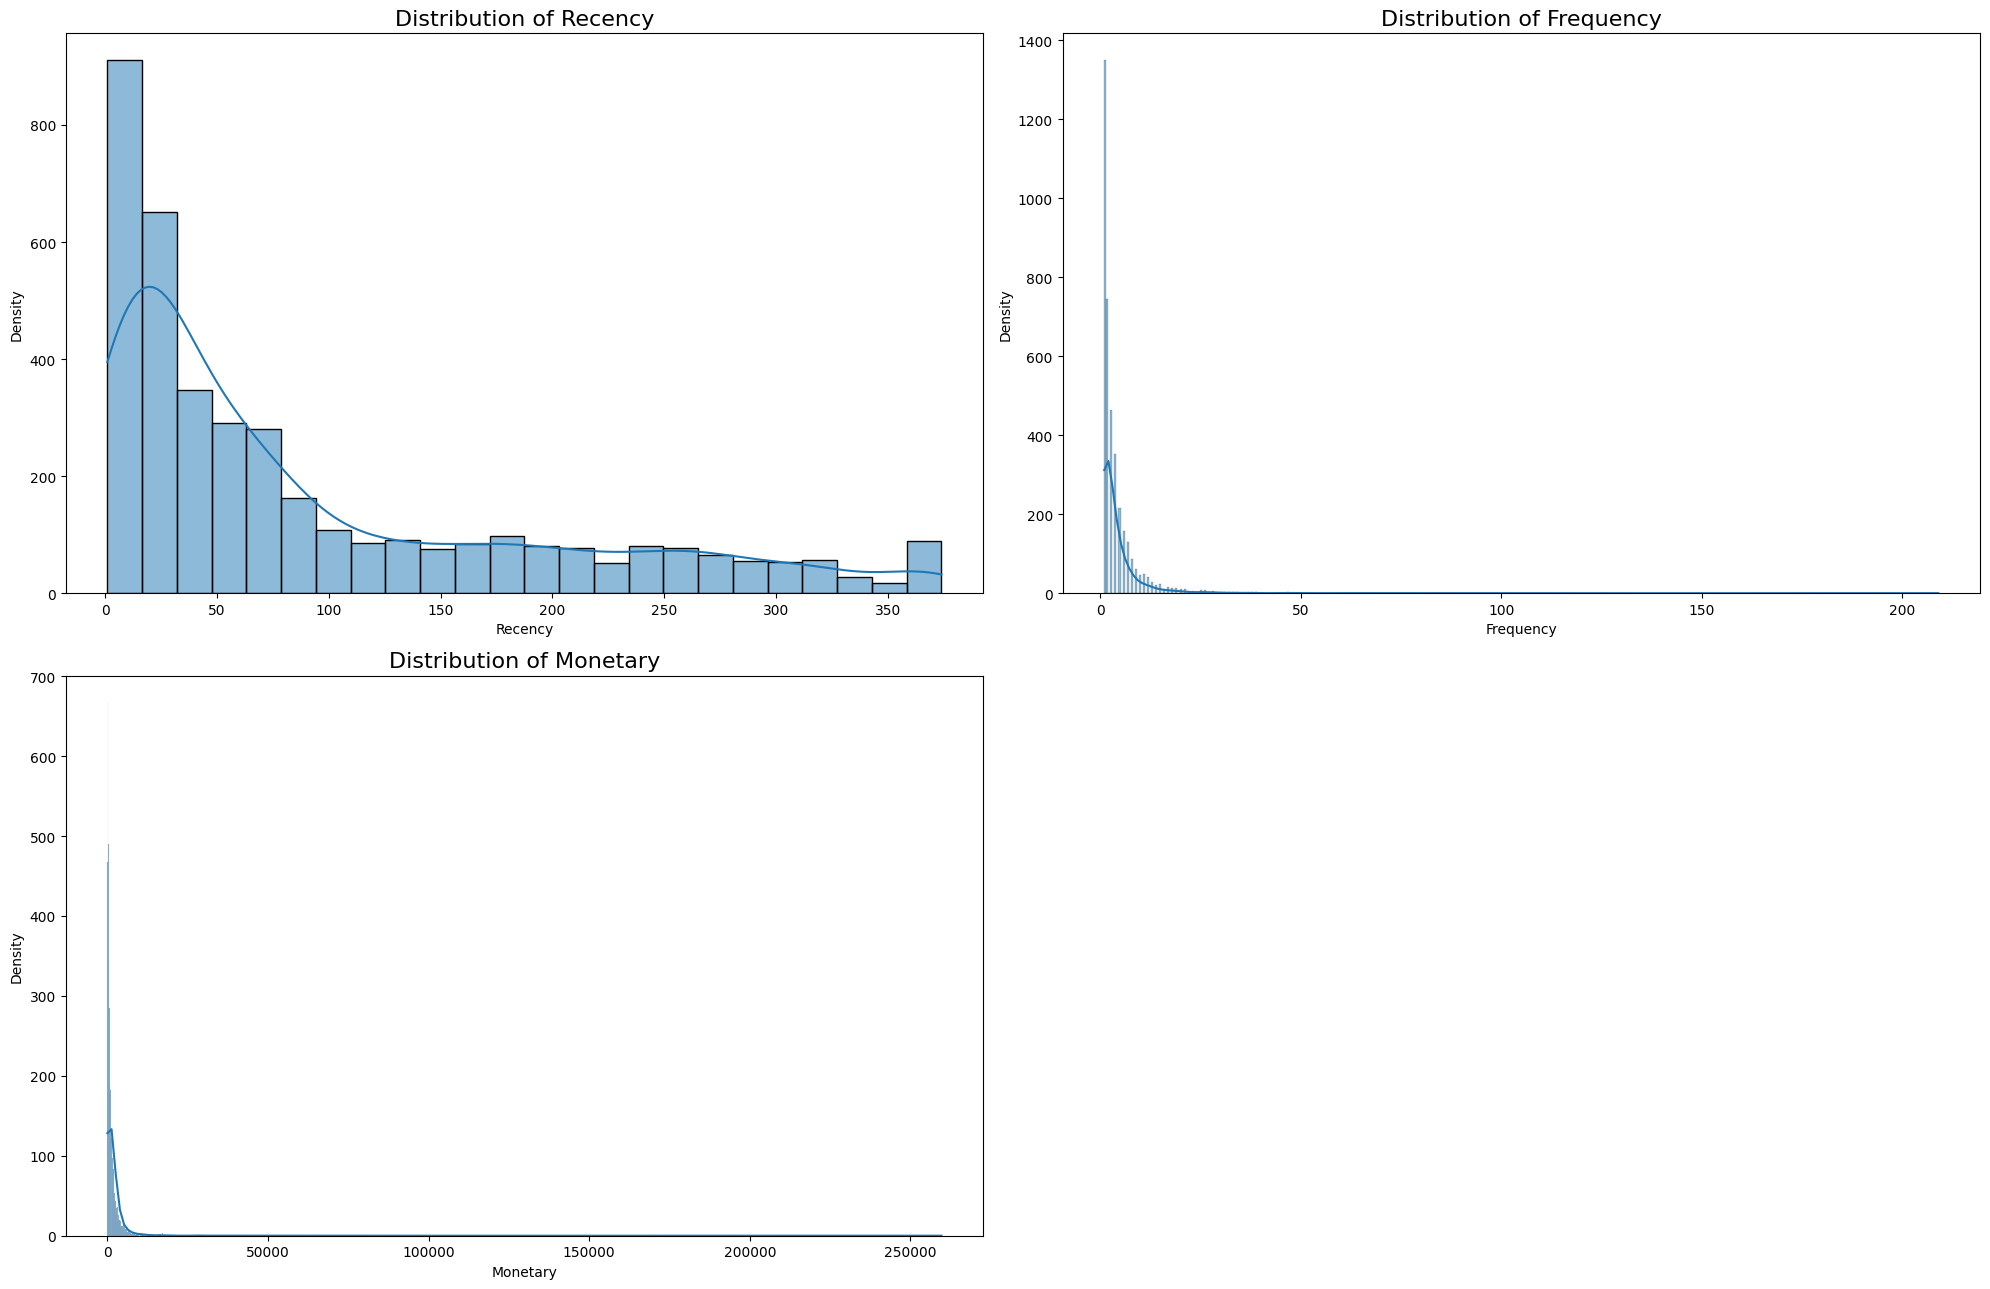

In [ ]:
# plot the distribution of the RFM values

plt.figure(figsize=(20, 13))  # Create figure

for i, feature in enumerate(RFM_df.columns,1):  # i start with 1
    plt.subplot(2, 2, i)  # 2 rows, 2 columns for subplots
    sns.histplot(RFM_df[feature], kde=True)
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### **Applying Log(1+x) Transformation to Recency, Frequency, and Monetary**

Applying log transformation in RFM analysis helps normalize data, reduce skewness, and minimize outlier effects, making segmentation and clustering more effective.

In [ ]:
# Treat negative and zero values before log transformation
def handle_negative(num):
    return 1 if num <= 0 else num

# Apply function to Recency & Monetary columns
RFM_df[['Recency', 'Monetary']] = RFM_df[['Recency', 'Monetary']].applymap(handle_negative) # applymap is efficient than list comprehension with df.

# Apply log transformation (Recommended: log1p for safety)
log_df = RFM_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p).round(3)  # Log(1+x) for ensures stability in case any value is zero, which prevents errors.


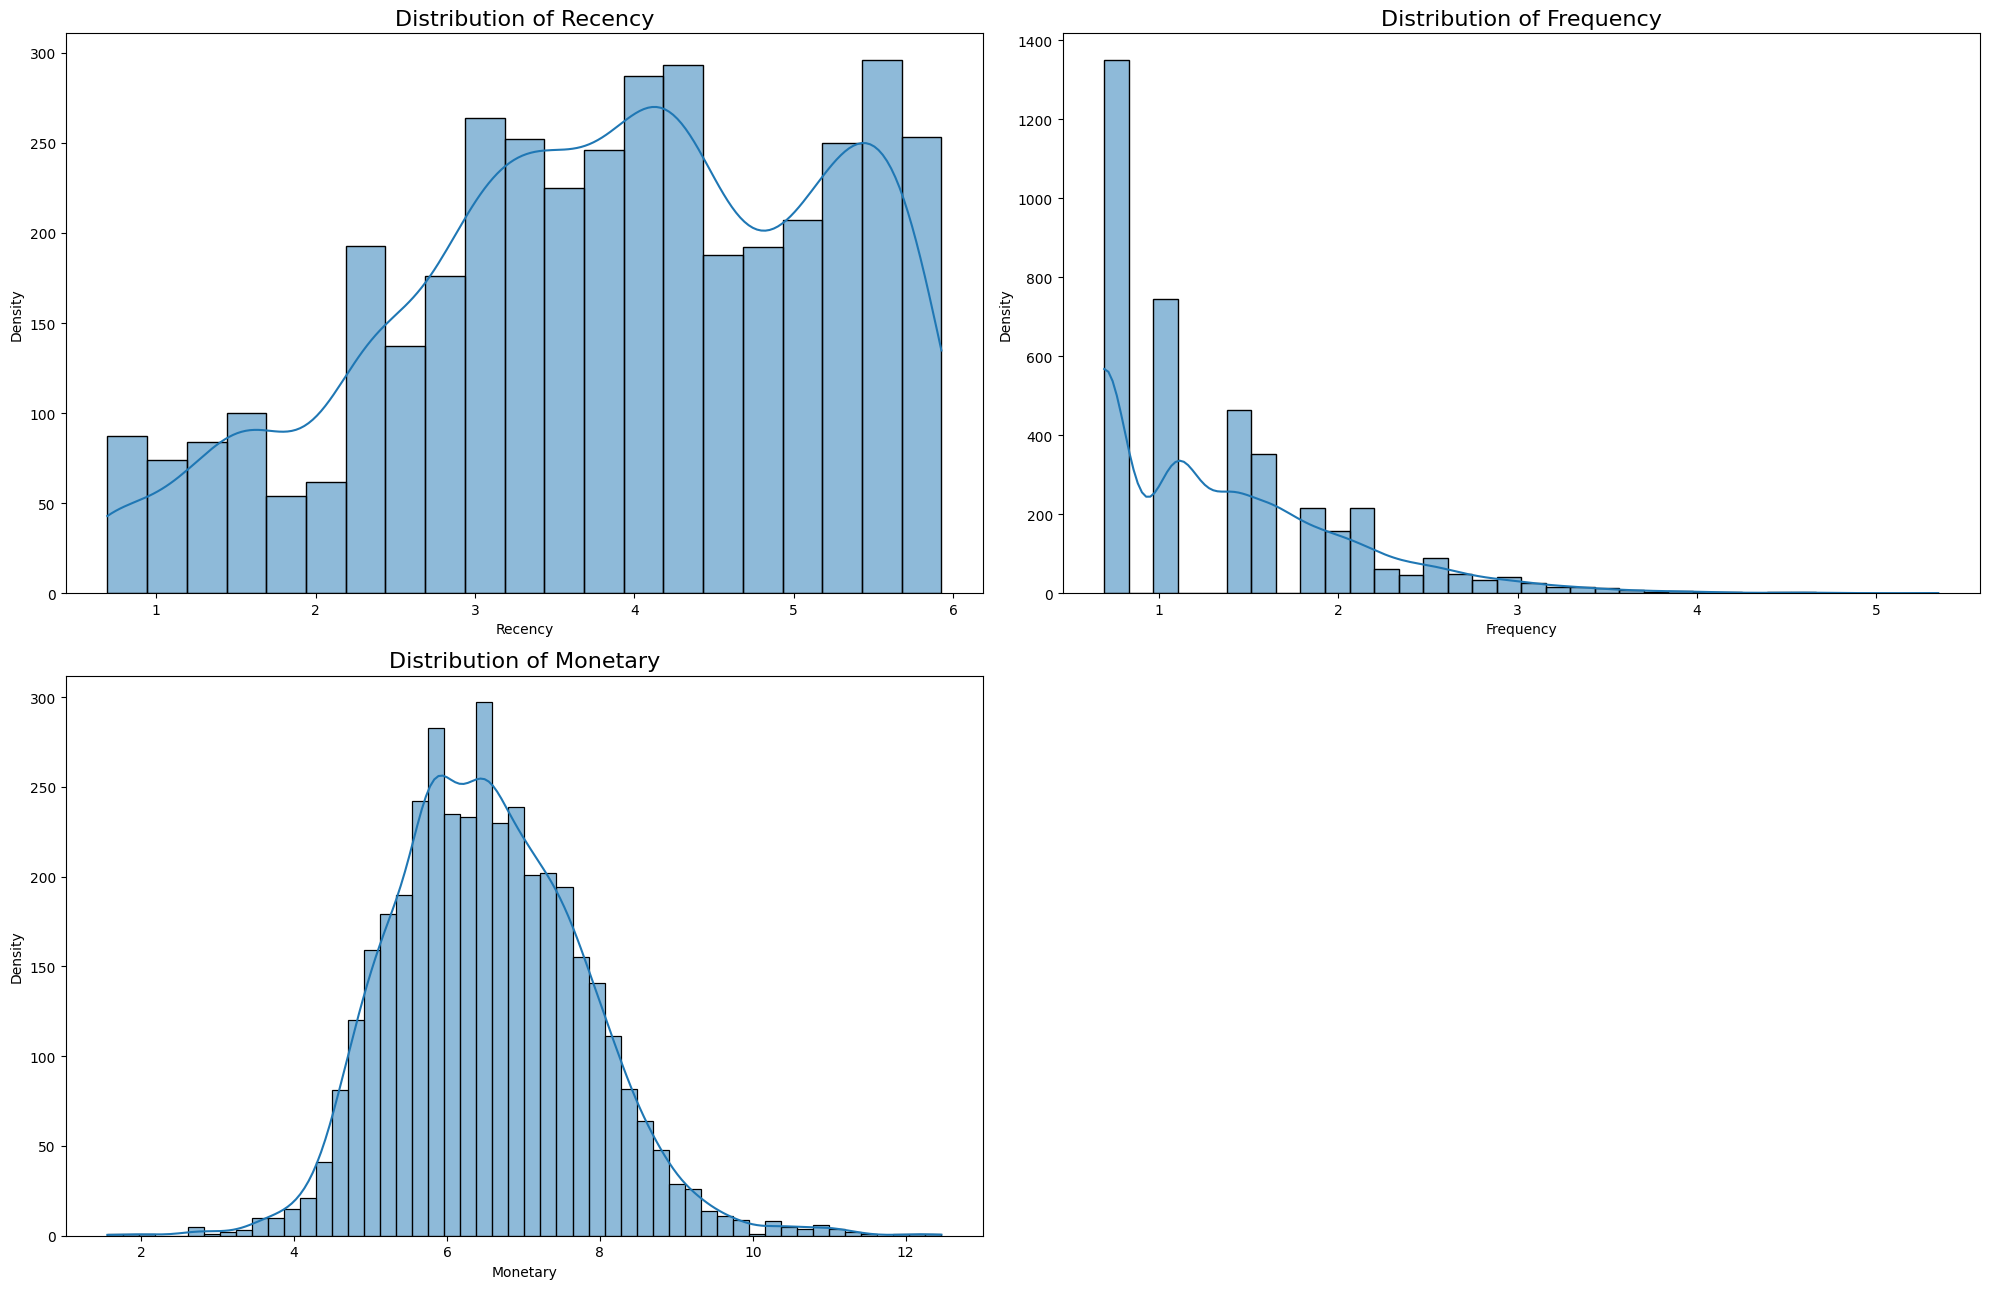

In [ ]:
# Define number of features
num_features = len(log_df.columns)

# Set rows and columns dynamically
rows = (num_features // 2) + (num_features % 2) # 3//2 = 1 , 3%2 = 1, so total rows = 2
cols = 2  # Keeping it at 2 per row

plt.figure(figsize=(20, 13))

# Loop through features with enumerate
for i, feature in enumerate(log_df.columns, 1):  # i start with 1
    plt.subplot(rows, cols, i)  # Dynamic layout
    sns.histplot(log_df[feature], kde=True)
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

The skewness in Recency, Frequency, and Monetary values has been significantly reduced.     
The data now aligns better with a normal distribution, making it more suitable for analysis.

In [ ]:
# Apply log(1 + x) transformation
RFM_df['Recency_log'] = np.log1p(RFM_df['Recency'])
RFM_df['Frequency_log'] = np.log1p(RFM_df['Frequency'])
RFM_df['Monetary_log'] = np.log1p(RFM_df['Monetary'])


In [ ]:
# show the first 5 rows of the transformed data
RFM_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,326,1,77183.60,5.789960,0.693147,11.253955
12747.0,2,11,4196.01,1.098612,2.484907,8.342128
12748.0,1,209,33053.19,0.693147,5.347108,10.405904
12749.0,4,5,4090.88,1.609438,1.791759,8.316760
12820.0,3,4,942.34,1.386294,1.609438,6.849427


In [ ]:
# Standardize the data
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = RFM_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features) # Normalize feature value

In [ ]:
print(X[:5])  # Display first 5 rows of scaled data

[[ 1.46376882 -0.95749052  3.78807665]
 [-2.03555369  1.66895933  1.44784065]
 [-2.3379941   5.86451528  3.10649751]
 [-1.65452383  0.65290983  1.42745251]
 [-1.8209688   0.38565386  0.24815687]]


Example - [1.46376882, -0.95749052, 3.78807665]         
This Customer has           
__High Recency (1.46)__ -  They made a purchase recently.       
__Low Frequency (-0.95)__ - Fewer purchases compared to others.     
__High Monetary Value (3.78)__ - Their total spending is much higher than average.      

## **Implementing K-Means Clustering:**


Elbow Method focuses on minimizing inertia (SSE), but it doesn't measure how distinct clusters are, making silhouette a more reliable choice for segmentation.

Silhouette Score, which directly evaluates how well-separated clusters are much better metric for segmentation quality.



For n_clusters = 2, the silhouette score is 0.43502616563899277
For n_clusters = 3, the silhouette score is 0.34483695040039386
For n_clusters = 4, the silhouette score is 0.33207124912331265
For n_clusters = 5, the silhouette score is 0.3186964665856635
For n_clusters = 6, the silhouette score is 0.3081613020665602
For n_clusters = 7, the silhouette score is 0.30720975604292783
For n_clusters = 8, the silhouette score is 0.30035750992856824
For n_clusters = 9, the silhouette score is 0.27676210147339564
For n_clusters = 10, the silhouette score is 0.28008536563466907


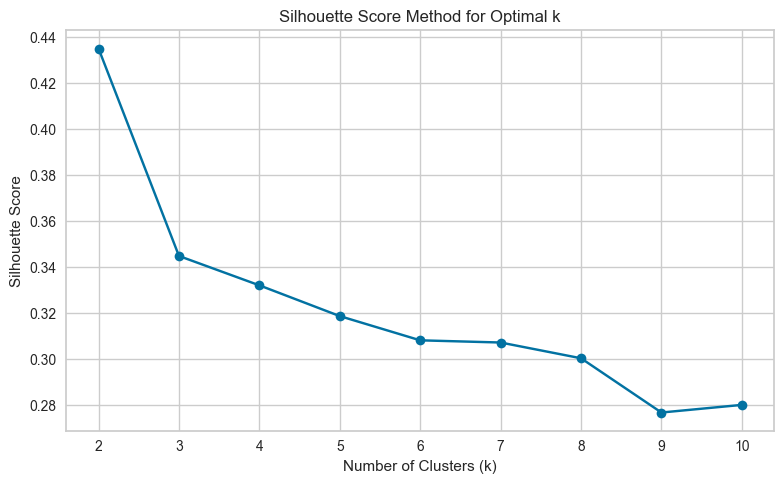

In [ ]:
# Find the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

# Visualize silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.title('Silhouette Score Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

The optimal number of clusters is typically the highest peak before a sharp decline.

This Model needs may require more granularity, making k=3 or k=4 viable choices.

__A 3-cluster model show a balance between simplicity and actionable segmentation, while 4 clusters offer deeper insights while remaining manageable.__

With 4 clusters, can be divide into:
1. VIP Shoppers – High spending, frequent purchases.
2. Loyal Customers – Moderate spending but consistent shopping.
3. Occasional Buyers – Infrequent purchases, medium spending.
4. Inactive Customers – Rare purchases, low spending



In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer  # Import SilhouetteVisualizer

# Define range for K values
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.43510724307447374


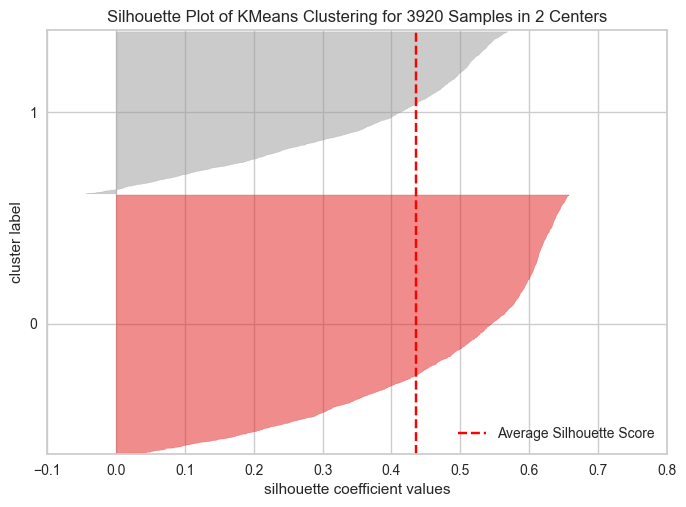

For n_clusters = 3, silhouette score is 0.3410552497756589


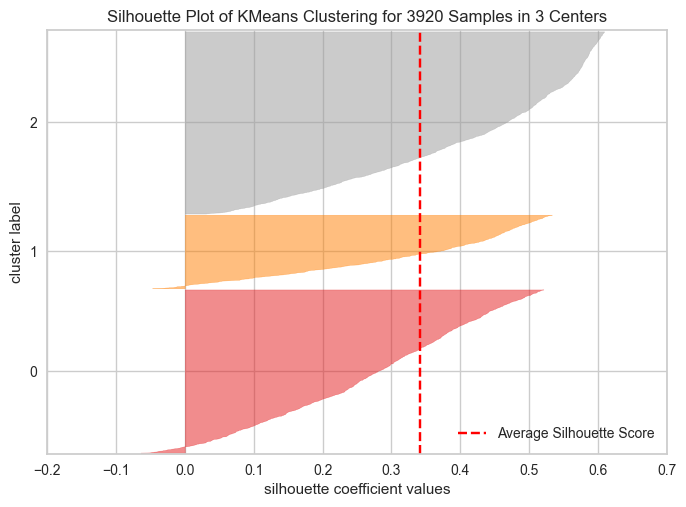

For n_clusters = 4, silhouette score is 0.339808151212765


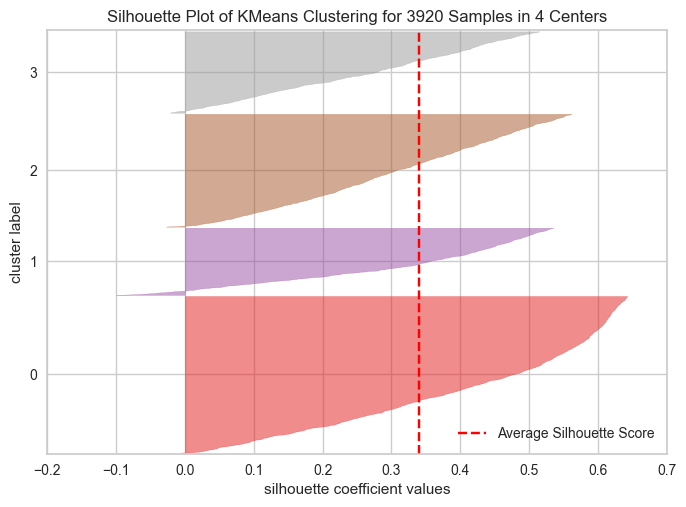

For n_clusters = 5, silhouette score is 0.31646721521623666


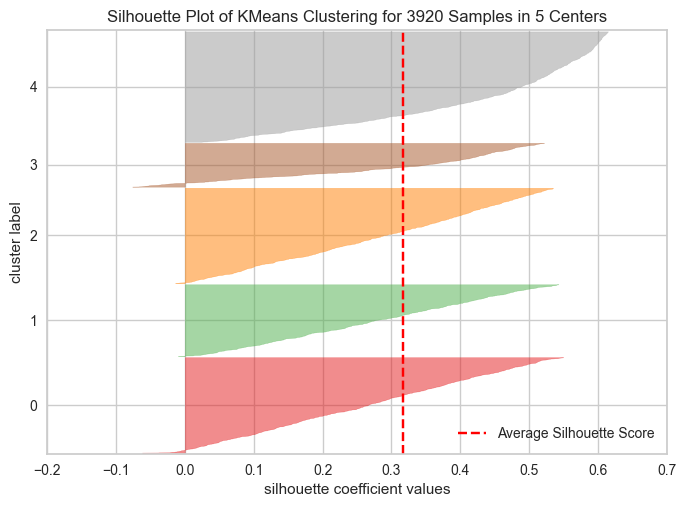

For n_clusters = 6, silhouette score is 0.31581760950109733


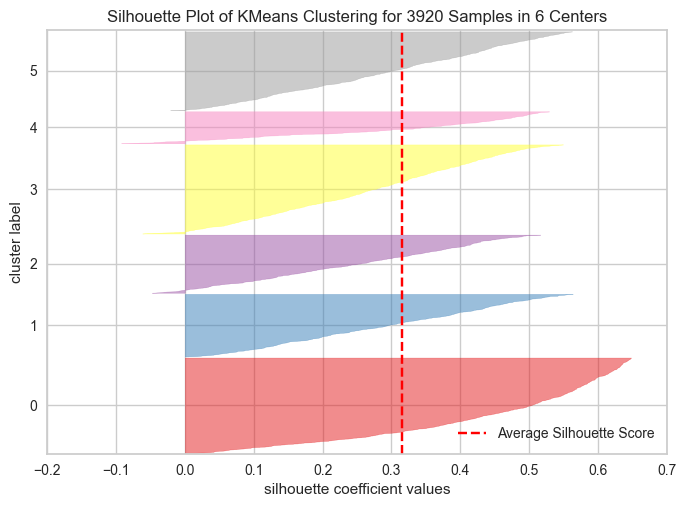

For n_clusters = 7, silhouette score is 0.31096852231542355


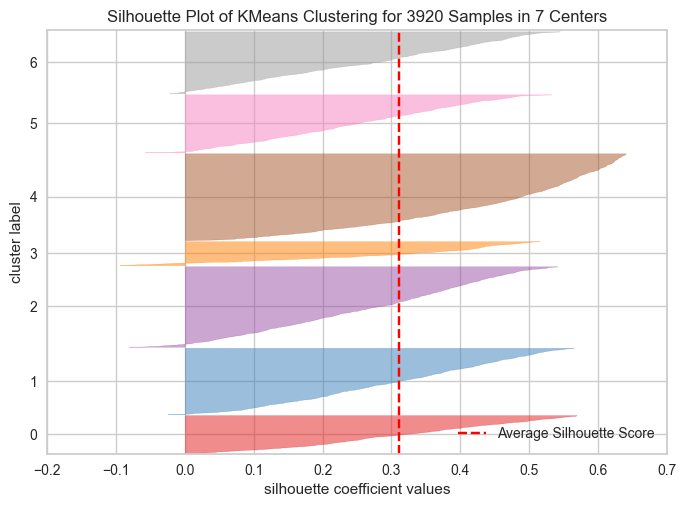

For n_clusters = 8, silhouette score is 0.29556961528456227


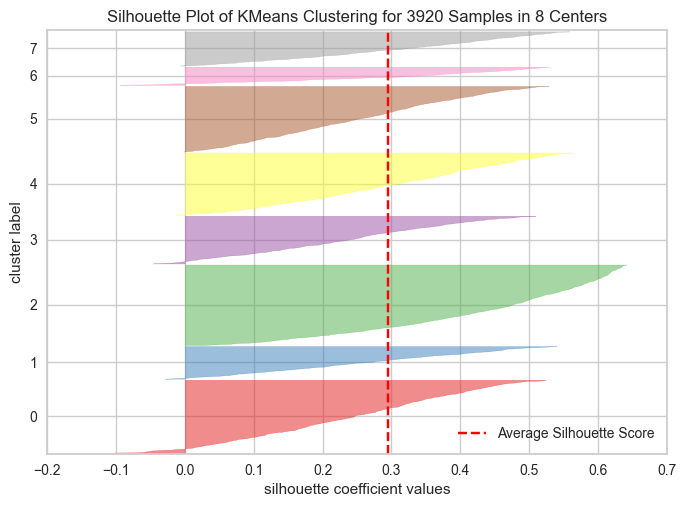

For n_clusters = 9, silhouette score is 0.3002175940447625


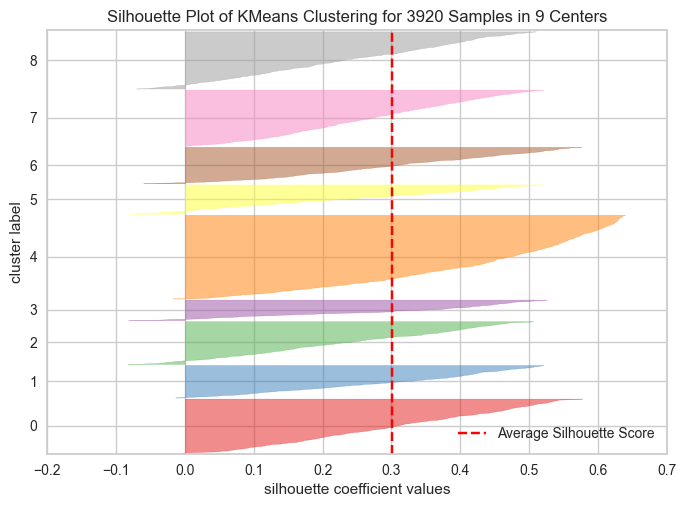

In [ ]:
silhouette_analysis(10)  # Call the function with n=10

The analysis shows that using 4 clusters gives well-separated customer groups. This means customers are grouped based on similar shopping habits, making it easier to target them with personalized offers and marketing strategies.

In [ ]:
# Assuming optimal k=4 based on silhouette analysis
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
RFM_df['Cluster'] = kmeans.fit_predict(X)

# Analyze the clusters
cluster_analysis = RFM_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})
print("\nCluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
            Recency  Frequency     Monetary
Cluster                                    
0        190.631505   1.369902   351.751935
1         59.708720   4.426716  1783.124827
2         10.771667  13.985000  7484.817300
3         23.841463   1.871951   453.334695


### **Interpretation:**

__Cluster 0__ __(Inactive Customers)__ - Rare purchases, low spending   

 High Recency (190 days) - Haven't purchased in a long time.       
Low Frequency (1.37 purchases) - Rarely shop.   
Low Spending ($351.75) - Minimal monetary contribution.   

*Strategy:* Engage with reactivation campaigns, special discounts, or reminders.

__Cluster 1__ __(Loyal Customers)__ - Moderate spending but consistent shopping.   

Medium Recency (59 days) - Purchase occasionally.     
Moderate Frequency (4.42 purchases) - Some engagement.      
High Spending ($1783.12) - Valuable customers.  

*Strategy:* Encourage repeat purchases with personalized recommendations.    

__Cluster 2__ __(VIP Customers)__ - High spending, frequent purchases.
     
Low Recency (10 days) - Recently active.     
High Frequency (13.98 purchases) - Frequent shoppers.       
High Spending ($7484.82) - Most valuable segment.

*Strategy:* Offer VIP perks, loyalty programs, and early access to new collections.      

__Cluster 3__ __(Occasional Buyers)__ - Infrequent purchases, medium spending.
            
Moderate Recency (23 days) - Bought recently but not consistently.      
Low Frequency (1.87 purchases) - Occasional buyers.      
Medium Spending ($453.33) - May need incentives to shop more.  

*Strategy:* Provide introductory offers, bundle deals, and personalized nudges.    


# **Conclusion**

By applying RFM analysis, we successfully categorized customers based on Recency, Frequency, and Monetary value, giving us clear behavioral insights.

Using K-Means clustering, we optimized segmentation to identify distinct customer groups, allowing for targeted marketing strategies and enhanced customer engagement.

__Key Outcomes:__  

__Data-driven segmentation__ – Helps Myntra personalize promotions.

__Optimal K=4 clusters chosen__ – Ensures meaningful segmentation.

__Customer personas defined__ – VIP Customers, Loyal customers,  Occasional Buyers and Inactive Customers.

__Actionable strategies__ – Re-engagement campaigns, VIP loyalty programs, personalized recommendations.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***